# Analyse des données de Demandes de Valeurs Foncières (DVF)

## Importation des modules

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Préparation des données

In [2]:
url = 'https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20240408-125738/valeursfoncieres-2023.txt'
df = pd.read_csv(url, sep='|', low_memory=False).dropna(axis=1, how='all')
df

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,1,05/01/2023,Vente,"1070000,00",184.0,NaN,ALL,0124,DES HETRES,1630.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
1,1,05/01/2023,Vente,"1070000,00",159.0,NaN,ALL,0124,DES HETRES,1630.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
2,1,05/01/2023,Vente,"1070000,00",159.0,NaN,ALL,0124,DES HETRES,1630.0,...,NaN,NaN,1,2.0,Appartement,233.0,8.0,NaN,NaN,NaN
3,1,03/01/2023,Vente,"152200,00",2914.0,NaN,RTE,0107,DE PONCIN,1450.0,...,NaN,NaN,0,1.0,Maison,64.0,3.0,S,NaN,988.0
4,1,05/01/2023,Vente,"269000,00",427.0,T,CHE,0040,DE L'AUBEPIN,1800.0,...,NaN,NaN,0,1.0,Maison,73.0,3.0,S,NaN,835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,1,05/10/2023,Adjudication,"3931000,00",39.0,NaN,AV,1832,CHARLES FLOQUET,75007.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3727001,1,05/10/2023,Adjudication,"3931000,00",39.0,NaN,AV,1832,CHARLES FLOQUET,75007.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3727002,1,05/10/2023,Adjudication,"3931000,00",39.0,NaN,AV,1832,CHARLES FLOQUET,75007.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
3727003,1,28/12/2023,Vente,"98250,00",66.0,B,RUE,8892,SEBASTIEN MERCIER,75015.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN


In [68]:
# On prend le département de Paris
df1 = df[df['Code departement'] == '75']

# Dates = pd.to_datetime(df1['Date mutation'], dayfirst=True)

df1_cleaned = df1.drop(['B/T/Q', 'Voie', 'Code voie', 'Commune', 'No Volume', '1er lot', '2eme lot', '3eme lot', '4eme lot',  '5eme lot', 'Nombre de lots', 'Type local', 'No disposition'], axis=1)
df1_cleaned.isnull().sum()

Date mutation                     0
Nature mutation                   0
Valeur fonciere                 563
No voie                         205
Type de voie                    241
Code postal                     202
Code departement                  0
Code commune                      0
Prefixe de section            80420
Section                           0
No plan                           0
Surface Carrez du 1er lot     51213
Surface Carrez du 2eme lot    71555
Surface Carrez du 3eme lot    79565
Surface Carrez du 4eme lot    80226
Surface Carrez du 5eme lot    80345
Code type local                 804
Surface reelle bati             811
Nombre pieces principales       811
Nature culture                73224
Nature culture speciale       80420
Surface terrain               73224
dtype: int64

In [69]:
df1_cleaned

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,...,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
3646585,03/01/2023,Vente,"1825000,00",89.0,RUE,75001.0,75,101,NaN,AP,...,NaN,NaN,NaN,NaN,4.0,165.0,0.0,NaN,NaN,NaN
3646586,05/01/2023,Vente,"567000,00",51.0,RUE,75010.0,75,110,NaN,AV,...,NaN,NaN,NaN,NaN,4.0,52.0,0.0,NaN,NaN,NaN
3646587,04/01/2023,Vente,"140000,00",178.0,RUE,75017.0,75,117,NaN,BG,...,NaN,NaN,NaN,NaN,2.0,18.0,1.0,NaN,NaN,NaN
3646588,05/01/2023,Vente,"400000,00",12.0,RUE,75009.0,75,109,NaN,BD,...,NaN,NaN,NaN,NaN,2.0,43.0,1.0,NaN,NaN,NaN
3646589,04/01/2023,Vente,"141343,12",63.0,RUE,75018.0,75,118,NaN,AK,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,05/10/2023,Adjudication,"3931000,00",39.0,AV,75007.0,75,107,NaN,BU,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN
3727001,05/10/2023,Adjudication,"3931000,00",39.0,AV,75007.0,75,107,NaN,BU,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN
3727002,05/10/2023,Adjudication,"3931000,00",39.0,AV,75007.0,75,107,NaN,BU,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN
3727003,28/12/2023,Vente,"98250,00",66.0,RUE,75015.0,75,115,NaN,FV,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,NaN,NaN,NaN


### Numérisation des données

## Numérisation des données

In [70]:
df1_cleaned['Valeur fonciere'] = df1_cleaned['Valeur fonciere'].str.replace(',', '.').astype(float)

df1_cleaned['Type de voie'] = df1_cleaned['Type de voie'].astype("category").cat.codes
df1_cleaned['Nature mutation'] = df1_cleaned["Nature mutation"].astype("category").cat.codes

df1_cleaned['Nature culture'] = df1_cleaned["Nature culture"].astype("category").cat.codes

df1_cleaned['Nature culture speciale'] = df1_cleaned["Nature culture speciale"].fillna("0").astype("category").cat.codes
df1_cleaned['Nature culture speciale'] = df1_cleaned["Nature culture speciale"].astype("category").cat.codes

df1_cleaned['Section'] = df1_cleaned['Section'].astype("category").cat.codes
df1_cleaned['Code type local'] = df1_cleaned['Code type local'].astype("category").cat.codes
df1_cleaned['No voie'] = df1_cleaned['No voie'].astype("category").cat.codes

df1_cleaned.loc[df1_cleaned['Code departement'] == '2A', 'Code departement'] = 200
df1_cleaned.loc[df1_cleaned['Code departement'] == '2B', 'Code departement'] = 201
df1_cleaned['Code departement'] = df1_cleaned['Code departement'].astype(int)

df1_cleaned['Prefixe de section'] = df1_cleaned['Prefixe de section'].fillna(0).astype(int)

#Transformer les surfaces en float
df1_cleaned['Surface Carrez du 1er lot'] = df1_cleaned['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float)
df1_cleaned['Surface Carrez du 2eme lot'] = df1_cleaned['Surface Carrez du 2eme lot'].str.replace(',', '.').astype(float)
df1_cleaned['Surface Carrez du 3eme lot'] = df1_cleaned['Surface Carrez du 3eme lot'].str.replace(',', '.').astype(float)
df1_cleaned['Surface Carrez du 4eme lot'] = df1_cleaned['Surface Carrez du 4eme lot'].str.replace(',', '.').astype(float)
df1_cleaned['Surface Carrez du 5eme lot'] = df1_cleaned['Surface Carrez du 5eme lot'].str.replace(',', '.').astype(float)

#On met les valeurs manquantes à 0 pour les surfaces
df1_cleaned['Surface reelle bati'] = df1_cleaned['Surface reelle bati'].fillna(0)
df1_cleaned['Surface terrain'] = df1_cleaned['Surface terrain'].fillna(0)
df1_cleaned['Surface Carrez du 1er lot'] = df1_cleaned['Surface Carrez du 1er lot'].fillna(0)
df1_cleaned['Surface Carrez du 2eme lot'] = df1_cleaned['Surface Carrez du 2eme lot'].fillna(0)
df1_cleaned['Surface Carrez du 3eme lot'] = df1_cleaned['Surface Carrez du 3eme lot'].fillna(0)
df1_cleaned['Surface Carrez du 4eme lot'] = df1_cleaned['Surface Carrez du 4eme lot'].fillna(0)
df1_cleaned['Surface Carrez du 5eme lot'] = df1_cleaned['Surface Carrez du 5eme lot'].fillna(0)

df1_cleaned['Surface Totale'] = df1_cleaned['Surface reelle bati'] + df1_cleaned['Surface terrain'] + df1_cleaned['Surface Carrez du 1er lot'] + df1_cleaned['Surface Carrez du 2eme lot'] + df1_cleaned['Surface Carrez du 3eme lot'] + df1_cleaned['Surface Carrez du 4eme lot'] + df1_cleaned['Surface Carrez du 5eme lot']

df1_cleaned = df1_cleaned.drop(['Surface terrain', 'Surface reelle bati', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot'], axis=1)


In [71]:
df1_cleaned

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface Totale
3646585,03/01/2023,3,1825000.00,88,17,75001.0,75,101,0,15,50,3,0.0,-1,0,260.21
3646586,05/01/2023,3,567000.00,50,17,75010.0,75,110,0,21,75,3,0.0,-1,0,52.00
3646587,04/01/2023,3,140000.00,177,17,75017.0,75,117,0,32,53,1,1.0,-1,0,36.75
3646588,05/01/2023,3,400000.00,11,17,75009.0,75,109,0,29,36,1,1.0,-1,0,86.80
3646589,04/01/2023,3,141343.12,62,17,75018.0,75,118,0,10,14,2,0.0,-1,0,11.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,05/10/2023,0,3931000.00,38,1,75007.0,75,107,0,46,4,2,0.0,-1,0,0.00
3727001,05/10/2023,0,3931000.00,38,1,75007.0,75,107,0,46,4,2,0.0,-1,0,0.00
3727002,05/10/2023,0,3931000.00,38,1,75007.0,75,107,0,46,4,2,0.0,-1,0,0.00
3727003,28/12/2023,3,98250.00,65,17,75015.0,75,115,0,150,100,2,0.0,-1,0,0.00


In [72]:
df1_cleaned.isnull().sum()

Date mutation                  0
Nature mutation                0
Valeur fonciere              563
No voie                        0
Type de voie                   0
Code postal                  202
Code departement               0
Code commune                   0
Prefixe de section             0
Section                        0
No plan                        0
Code type local                0
Nombre pieces principales    811
Nature culture                 0
Nature culture speciale        0
Surface Totale                 0
dtype: int64

In [73]:
df1_cleaned = df1_cleaned.dropna(axis=0, how='any')
df1_cleaned.isnull().sum()

Date mutation                0
Nature mutation              0
Valeur fonciere              0
No voie                      0
Type de voie                 0
Code postal                  0
Code departement             0
Code commune                 0
Prefixe de section           0
Section                      0
No plan                      0
Code type local              0
Nombre pieces principales    0
Nature culture               0
Nature culture speciale      0
Surface Totale               0
dtype: int64

In [75]:
df1_cleaned = df1_cleaned.drop_duplicates()
df1_cleaned

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface Totale
3646585,03/01/2023,3,1825000.00,88,17,75001.0,75,101,0,15,50,3,0.0,-1,0,260.21
3646586,05/01/2023,3,567000.00,50,17,75010.0,75,110,0,21,75,3,0.0,-1,0,52.00
3646587,04/01/2023,3,140000.00,177,17,75017.0,75,117,0,32,53,1,1.0,-1,0,36.75
3646588,05/01/2023,3,400000.00,11,17,75009.0,75,109,0,29,36,1,1.0,-1,0,86.80
3646589,04/01/2023,3,141343.12,62,17,75018.0,75,118,0,10,14,2,0.0,-1,0,11.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726995,16/02/2023,0,144000.00,4,17,75015.0,75,115,0,10,1,1,1.0,-1,0,15.00
3726996,05/10/2023,0,3931000.00,38,1,75007.0,75,107,0,46,4,2,0.0,-1,0,0.00
3726998,05/10/2023,0,3931000.00,38,1,75007.0,75,107,0,46,4,1,6.0,-1,0,206.00
3727003,28/12/2023,3,98250.00,65,17,75015.0,75,115,0,150,100,2,0.0,-1,0,0.00


In [76]:
Dates = pd.to_datetime(df1_cleaned['Date mutation'], dayfirst=True)
df1_cleaned_with_dates = df1_cleaned.copy(deep=True)
df1_cleaned = df1_cleaned.drop('Date mutation', axis=1)
df1_cleaned

,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface Totale
3646585,3,1825000.00,88,17,75001.0,75,101,0,15,50,3,0.0,-1,0,260.21
3646586,3,567000.00,50,17,75010.0,75,110,0,21,75,3,0.0,-1,0,52.00
3646587,3,140000.00,177,17,75017.0,75,117,0,32,53,1,1.0,-1,0,36.75
3646588,3,400000.00,11,17,75009.0,75,109,0,29,36,1,1.0,-1,0,86.80
3646589,3,141343.12,62,17,75018.0,75,118,0,10,14,2,0.0,-1,0,11.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726995,0,144000.00,4,17,75015.0,75,115,0,10,1,1,1.0,-1,0,15.00
3726996,0,3931000.00,38,1,75007.0,75,107,0,46,4,2,0.0,-1,0,0.00
3726998,0,3931000.00,38,1,75007.0,75,107,0,46,4,1,6.0,-1,0,206.00
3727003,3,98250.00,65,17,75015.0,75,115,0,150,100,2,0.0,-1,0,0.00


In [77]:
df1_cleaned['Nature culture']

3646585   -1
3646586   -1
3646587   -1
3646588   -1
3646589   -1
          ..
3726995   -1
3726996   -1
3726998   -1
3727003   -1
3727004   -1
Name: Nature culture, Length: 66715, dtype: int8

In [78]:
Dates

3646585   2023-01-03
3646586   2023-01-05
3646587   2023-01-04
3646588   2023-01-05
3646589   2023-01-04
             ...    
3726995   2023-02-16
3726996   2023-10-05
3726998   2023-10-05
3727003   2023-12-28
3727004   2023-12-28
Name: Date mutation, Length: 66715, dtype: datetime64[ns]

In [79]:
# TODO : trouver un groupby adapté

## Visualisation des données

### Matrice de corrélation

In [80]:
# Matrice de corrélation
correlation_matrix = df1_cleaned.corr()
correlation_matrix

,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface Totale
Nature mutation,1.000000,0.144058,-0.000469,0.008839,0.003033,NaN,0.003033,NaN,0.001671,0.000501,-0.001707,-0.003193,0.028915,NaN,0.031777
Valeur fonciere,0.144058,1.000000,-0.008507,0.005401,-0.089890,NaN,-0.089890,NaN,-0.021945,-0.019400,0.058846,0.007953,0.264298,NaN,0.255642
No voie,-0.000469,-0.008507,1.000000,-0.132931,0.043439,NaN,0.043439,NaN,0.000851,-0.038306,0.010694,-0.007060,-0.001007,NaN,0.010046
Type de voie,0.008839,0.005401,-0.132931,1.000000,-0.029818,NaN,-0.029818,NaN,-0.062402,0.104125,-0.026131,-0.020640,0.016475,NaN,-0.019761
Code postal,0.003033,-0.089890,0.043439,-0.029818,1.000000,NaN,1.000000,NaN,0.363364,0.021442,-0.047378,-0.018628,-0.079898,NaN,-0.049770
Code departement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Code commune,0.003033,-0.089890,0.043439,-0.029818,1.000000,NaN,1.000000,NaN,0.363364,0.021442,-0.047378,-0.018628,-0.079898,NaN,-0.049770
Prefixe de section,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Section,0.001671,-0.021945,0.000851,-0.062402,0.363364,NaN,0.363364,NaN,1.000000,-0.034266,-0.006008,-0.005423,-0.027991,NaN,0.007496
No plan,0.000501,-0.019400,-0.038306,0.104125,0.021442,NaN,0.021442,NaN,-0.034266,1.000000,-0.026243,0.002313,0.036993,NaN,-0.013212


In [81]:
correlation_matrix.isnull().sum()

Nature mutation               3
Valeur fonciere               3
No voie                       3
Type de voie                  3
Code postal                   3
Code departement             15
Code commune                  3
Prefixe de section           15
Section                       3
No plan                       3
Code type local               3
Nombre pieces principales     3
Nature culture                3
Nature culture speciale      15
Surface Totale                3
dtype: int64

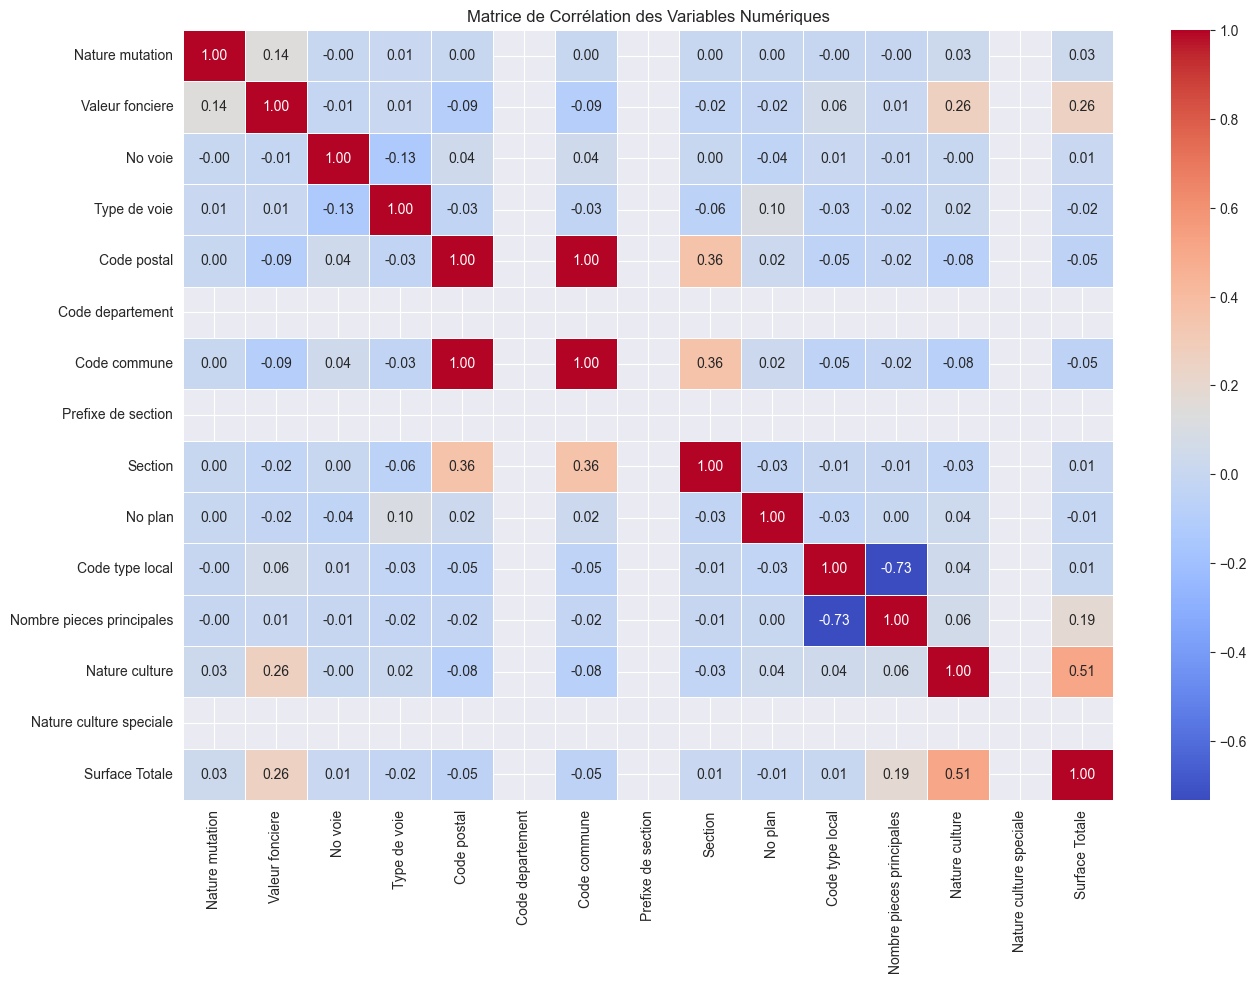

In [82]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

### Date mutation VS Valeur foncière

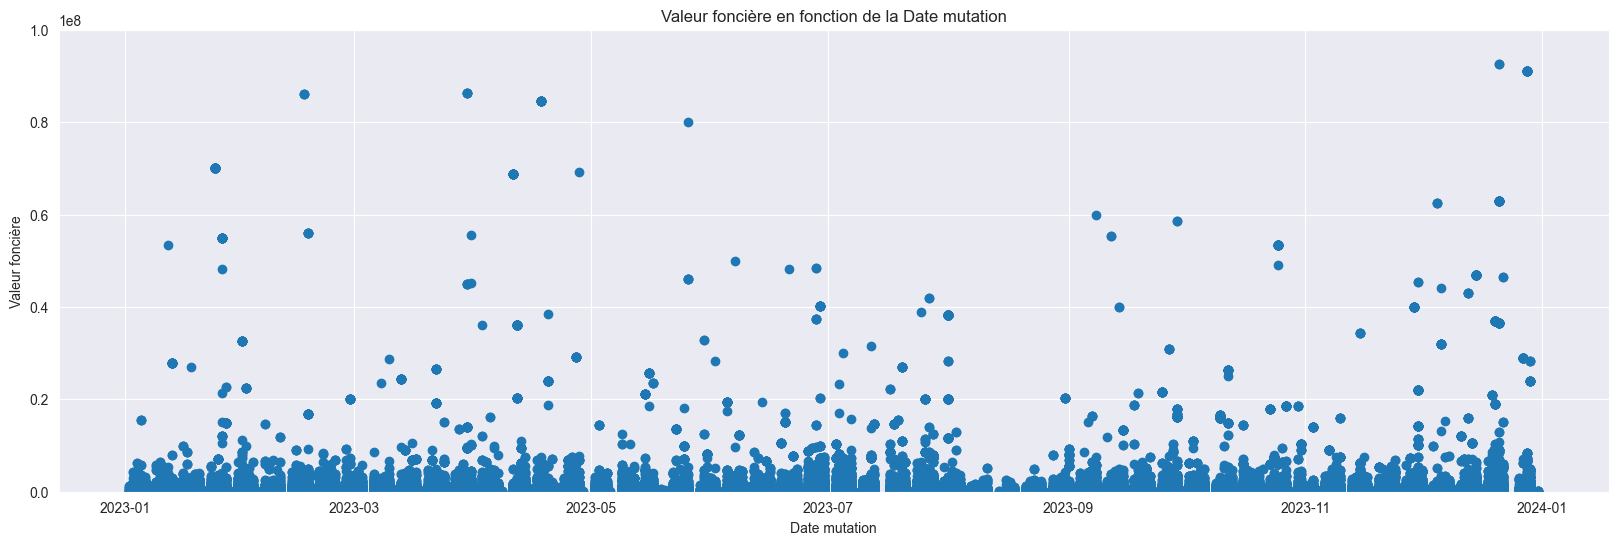

In [206]:
plt.figure(figsize=(20, 6))
plt.scatter(Dates, df1_cleaned['Valeur fonciere'])
plt.ylim(0, 100000000)
plt.xlabel('Date mutation')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière en fonction de la Date mutation')
plt.show()

On n'observe pas de corrélation entre la date de mutation et la valeur foncière.

### Valeur foncière VS Surface Totale

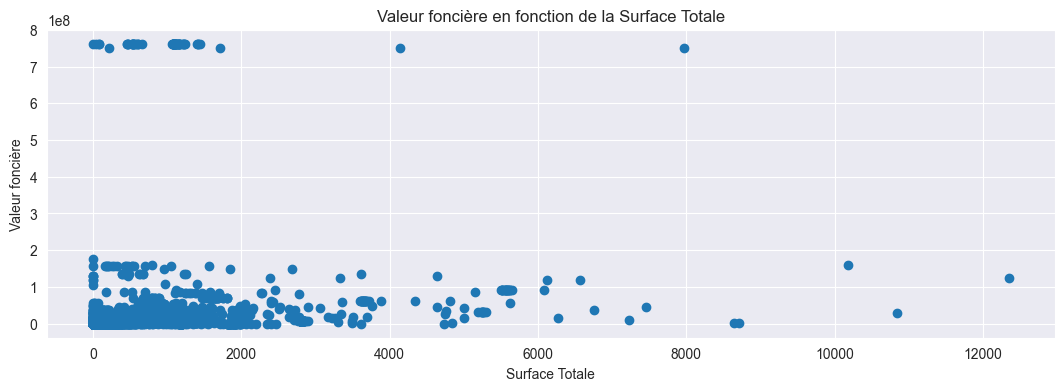

In [207]:
plt.figure(figsize=(13, 4))
plt.scatter(df1_cleaned['Surface Totale'], df1_cleaned['Valeur fonciere'])
plt.xlabel('Surface Totale')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière en fonction de la Surface Totale')
plt.show()

# TODO : Ajouter une régression linéaire

### Code département VS Valeur foncière

On utilise la moyenne de la valeur foncière pour chaque code département. Cela permet d'annuler l'effet des vlaleurs extrêmes.

In [208]:
df1_cleaned['Code postal']

3646585    75001.0
3646586    75010.0
3646587    75017.0
3646588    75009.0
3646589    75018.0
            ...   
3726995    75015.0
3726996    75007.0
3726998    75007.0
3727003    75015.0
3727004    75015.0
Name: Code postal, Length: 67044, dtype: float64

In [209]:
means_valeur_fonciere = df1_cleaned.groupby('Code postal')['Valeur fonciere'].mean()

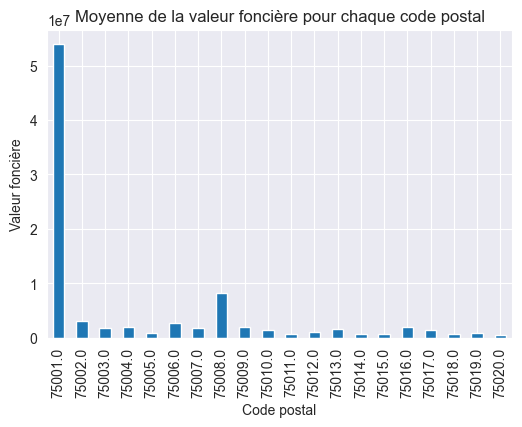

In [210]:
# Moyenen de la valeur foncière pour chaque arrondissement de Paris
plt.figure(figsize=(6, 4))
means_valeur_fonciere.plot(kind='bar')
plt.xlabel('Code postal')
plt.ylabel('Valeur foncière')
plt.title('Moyenne de la valeur foncière pour chaque code postal')
plt.show()

On observe des une valeur foncière moyenne annormalement élevé pour le 1er arrondissement de Paris. Cela est dû à des valeurs extrêmes. On va donc supprimer ces valeurs extrêmes pour mieux visualiser.

In [211]:
df1_cleaned_without_extrem = df1_cleaned[df1_cleaned['Valeur fonciere'] < 700000000]
means_valeur_fonciere_without_extrem = df1_cleaned_without_extrem.groupby('Code postal')['Valeur fonciere'].mean()
means_valeur_fonciere_without_extrem

Code postal
75001.0    2.263346e+06
75002.0    3.021876e+06
75003.0    1.728915e+06
75004.0    1.878818e+06
75005.0    9.129835e+05
75006.0    2.708804e+06
75007.0    1.840984e+06
75008.0    6.555538e+06
75009.0    1.936365e+06
75010.0    1.335397e+06
75011.0    6.647858e+05
75012.0    1.077447e+06
75013.0    1.580196e+06
75014.0    7.450194e+05
75015.0    7.153282e+05
75016.0    1.940614e+06
75017.0    1.365023e+06
75018.0    5.724746e+05
75019.0    7.616552e+05
75020.0    5.052468e+05
Name: Valeur fonciere, dtype: float64

In [212]:
import numpy as np

mean_price = df1_cleaned['Valeur fonciere'].mean()
std_dev_price = df1_cleaned['Valeur fonciere'].std()
df1_cleaned['z_score'] = (df1_cleaned['Valeur fonciere'] - mean_price) / std_dev_price
threshold = 3

# Filtrer les observations aberrantes
filtered_data = df1_cleaned[df1_cleaned['z_score'].abs() <= threshold]

# Supprimer la colonne z-score ajoutée
filtered_data.drop('z_score', axis=1, inplace=True)

C:\Users\marte\AppData\Local\Temp\ipykernel_15020\3678132112.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop('z_score', axis=1, inplace=True)


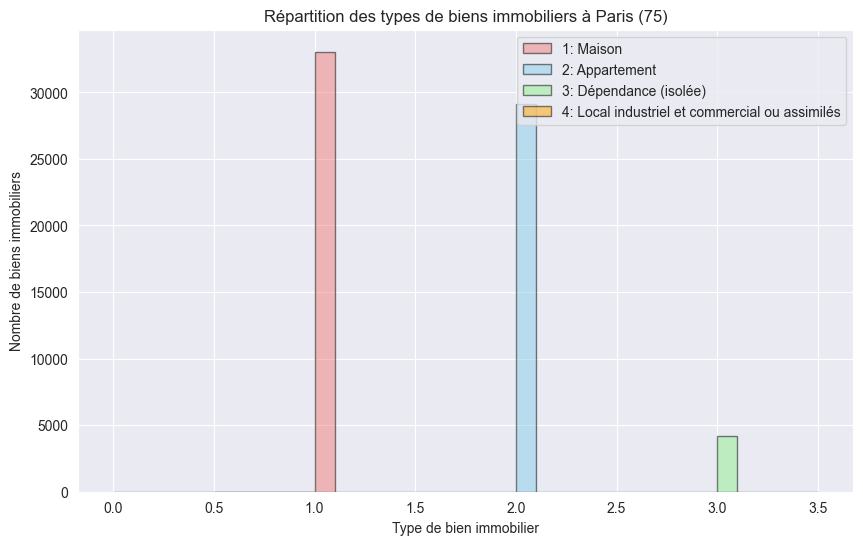

In [213]:
#Histogramme nombre de type de vente dans paris en 2023
plt.figure(figsize=(10, 6))

labels = {1: 'Maison', 2: 'Appartement', 3: 'Dépendance (isolée)', 4: 'Local industriel et commercial ou assimilés'}

colors = ['lightcoral', 'skyblue', 'lightgreen', 'orange']

for code, color in zip(sorted(labels.keys()), colors):
    filtered_data_type = filtered_data[filtered_data['Code type local'] == code]
    plt.hist(filtered_data_type['Code type local'], bins=10, color=color, edgecolor='black', label=f"{code}: {labels[code]}", alpha=0.5)


plt.legend(loc='upper right')
plt.title('Répartition des types de biens immobiliers à Paris (75)')
plt.xlabel('Type de bien immobilier')
plt.ylabel('Nombre de biens immobiliers')
plt.grid(True)
plt.show()


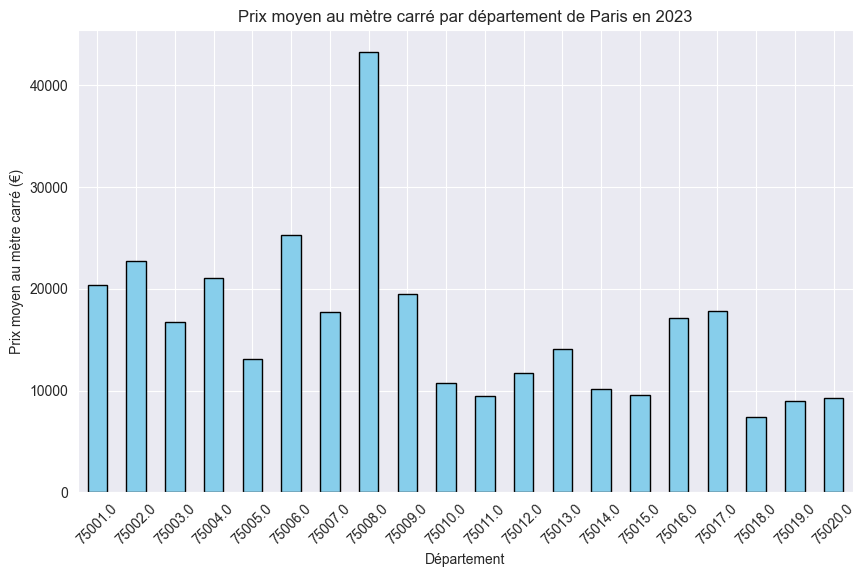

In [214]:
# Calculer le prix moyen au mètre carré pour chaque département
prix_moyen_par_departement = df1_cleaned_without_extrem.groupby('Code postal')['Valeur fonciere'].mean() / df1_cleaned_without_extrem.groupby('Code postal')['Surface Totale'].mean()

# Créer un diagramme en barres pour visualiser les prix moyens au mètre carré par département
plt.figure(figsize=(10, 6))
prix_moyen_par_departement.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Prix moyen au mètre carré par département de Paris en 2023')
plt.xlabel('Département')
plt.ylabel('Prix moyen au mètre carré (€)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## [Géomap](https://towardsdatascience.com/how-safe-are-the-streets-of-santiago-e01ba483ce4b) des valeurs foncières

### Import des modules

In [215]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geoplot as gplt

In [216]:
means_valeur_fonciere_without_extrem # on garde la moyenne par département réalisé précédemment

Code postal
75001.0    2.263346e+06
75002.0    3.021876e+06
75003.0    1.728915e+06
75004.0    1.878818e+06
75005.0    9.129835e+05
75006.0    2.708804e+06
75007.0    1.840984e+06
75008.0    6.555538e+06
75009.0    1.936365e+06
75010.0    1.335397e+06
75011.0    6.647858e+05
75012.0    1.077447e+06
75013.0    1.580196e+06
75014.0    7.450194e+05
75015.0    7.153282e+05
75016.0    1.940614e+06
75017.0    1.365023e+06
75018.0    5.724746e+05
75019.0    7.616552e+05
75020.0    5.052468e+05
Name: Valeur fonciere, dtype: float64

1. On convertit en DataFrame tout en gardant uniquement le numéro de l'arrondissement pour faciliter le merge des prochain dataframe

In [217]:
means_valeur_fonciere_without_extrem_df = pd.DataFrame(list(means_valeur_fonciere_without_extrem.items()), columns=['Code postal', 'Valeur fonciere'])
means_valeur_fonciere_without_extrem_df['Code postal'] = means_valeur_fonciere_without_extrem_df['Code postal'].astype(int)
means_valeur_fonciere_without_extrem_df['Code postal'] = means_valeur_fonciere_without_extrem_df['Code postal'].astype(str).str[-2:].astype(int).astype(object)
means_valeur_fonciere_without_extrem_df = means_valeur_fonciere_without_extrem_df.rename(columns={"Valeur fonciere" : 'valeur_fonciere'})
means_valeur_fonciere_without_extrem_df

,Code postal,valeur_fonciere
0,1,2.263346e+06
1,2,3.021876e+06
2,3,1.728915e+06
3,4,1.878818e+06
4,5,9.129835e+05
5,6,2.708804e+06
6,7,1.840984e+06
7,8,6.555538e+06
8,9,1.936365e+06
9,10,1.335397e+06


2. Les données géographiques vont être récupérées avec un fichier geojson et ensuite stockées dans un DataFrame

In [218]:
# On récupère  les données géographiques des arrondissements de Paris
#path = './map_Paris/arrondissements.shp'

#paris = gpd.read_file(path, encoding='utf-8')
#paris_shape = paris.to_crs('EPSG:4326')

file_path = 'arrondissements.geojson'
paris_shape = gpd.read_file(file_path)

3. Verification de la bonne importation du fichier

In [219]:
paris_shape.head()

n_sq_ar  c_ar  c_arinsee        l_ar              l_aroff    n_sq_co  \
0  750000007     7      75107   7ème Ardt       Palais-Bourbon  750001537   
1  750000017    17      75117  17ème Ardt  Batignolles-Monceau  750001537   
2  750000001     1      75101    1er Ardt               Louvre  750001537   
3  750000003     3      75103   3ème Ardt               Temple  750001537   
4  750000014    14      75114  14ème Ardt         Observatoire  750001537   

        surface     perimetre  \
0  4.090057e+06   8099.424883   
1  5.668835e+06  10775.579516   
2  1.824613e+06   6054.936862   
3  1.170883e+06   4519.263648   
4  5.614877e+06  10317.483310   

                                                 geom_x_y  \
0   {'lon': 2.3121876953655494, 'lat': 48.85617443127909}   
1  {'lon': 2.3067769905744084, 'lat': 48.887326522025816}   
2  {'lon': 2.3364433620533878, 'lat': 48.862562701836005}   
3   {'lon': 2.360000985897692, 'lat': 48.862872380016924}   
4   {'lon': 2.3265420441989466, 'lat': 48.82924450048987}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

4. Numérisation de l'arrondissement 

In [220]:
paris_shape['c_ar'] = paris_shape['c_ar'].astype(int)
paris_shape = paris_shape.sort_values(by='c_ar')

5. On merge le dataframe paris_shape avec means_valeur_fonciere_without_extrem_df

In [221]:
paris_shape = paris_shape.merge(means_valeur_fonciere_without_extrem_df, left_on='c_ar', right_on='Code postal', how='left')
paris_shape.head()

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,geom_x_y,geometry,Code postal,valeur_fonciere
0,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"{'lon': 2.3364433620533878, 'lat': 48.862562701836005}","POLYGON ((2.32801 48.86992, 2.32997 48.86851, 2.33031 48.86836, 2.33066 48.86819, 2.33173 48.86795, 2.33173 48.86795, 2.33368 48.86752, 2.33587 48.86700, 2.33587 48.86700, 2.33737 48.86665, 2.34108 48.86577, 2.34118 48.86575, 2.34120 48.86574, 2.34127 48.86573, 2.34127 48.86573, 2.34510 48.86481, 2.34668 48.86443, 2.34668 48.86443, 2.35095 48.86341, 2.35095 48.86340, 2.35021 48.86209, 2.35016 48.86199, 2.34945 48.86073, 2.34937 48.86058, 2.34822 48.85852, 2.34821 48.85849, 2.34756 48.85735, 2.34752 48.85731, 2.34752 48.85731, 2.34730 48.85722, 2.34718 48.85716, 2.34718 48.85716, 2.34705 48.85708, 2.34699 48.85701, 2.34680 48.85671, 2.34610 48.85559, 2.34598 48.85542, 2.34598 48.85542, 2.34590 48.85531, 2.34587 48.85528, 2.34459 48.85405, 2.34459 48.85405, 2.34286 48.85486, 2.34280 48.85490, 2.34268 48.85498, 2.34194 48.85563, 2.34086 48.85656, 2.34048 48.85677, 2.34038 48.85682, 2.34037 48.85683, 2.33755 48.85839, 2.33661 48.85858, 2.33291 48.85935, 2.32991 48.86013, 2.32990 48.86013, 2.32986 48.86015, 2.32982 48.86016, 2.32952 48.86027, 2.32833 48.86073, 2.32831 48.86074, 2.32707 48.86115, 2.32610 48.86148, 2.32528 48.86172, 2.32524 48.86173, 2.32523 48.86173, 2.32474 48.86189, 2.32094 48.86305, 2.32090 48.86306, 2.32129 48.86355, 2.32133 48.86360, 2.32140 48.86370, 2.32141 48.86371, 2.32157 48.86392, 2.32246 48.86505, 2.32254 48.86516, 2.32333 48.86618, 2.32345 48.86633, 2.32357 48.86649, 2.32357 48.86650, 2.32353 48.86651, 2.32459 48.86793, 2.32459 48.86793, 2.32467 48.86806, 2.32503 48.86859, 2.32532 48.86901, 2.32516 48.86945, 2.32521 48.86946, 2.32526 48.86946, 2.32547 48.86950, 2.32551 48.86951, 2.32569 48.86954, 2.32584 48.86956, 2.32584 48.86956, 2.32799 48.86993, 2.32801 48.86992, 2.32801 48.86992))",1,2.263346e+06
1,750000002,2,75102,2ème Ardt,Bourse,750001537,9.911537e+05,4554.104360,"{'lon': 2.3428025468913636, 'lat': 48.86827922252251}","POLYGON ((2.35152 48.86443, 2.35095 48.86341, 2.34668 48.86443, 2.34668 48.86443, 2.34510 48.86481, 2.34127 48.86573, 2.34127 48.86573, 2.34120 48.86574, 2.34118 48.86575, 2.34108 48.86577, 2.33737 48.86665, 2.33587 48.86700, 2.33587 48.86700, 2.33368 48.86752, 2.33173 48.86795, 2.33173 48.86795, 2.33066 48.86819, 2.33031 48.86836, 2.32997 48.86851, 2.32801 48.86992, 2.32984 48.87023, 2.33208 48.87062, 2.33415 48.87097, 2.33701 48.87146, 2.33710 48.87147, 2.33974 48.87193, 2.33990 48.87196, 2.34004 48.87198, 2.34307 48.87149, 2.34788 48.87070, 2.35096 48.87005, 2.35263 48.86969, 2.35426 48.86933, 2.35298 48.86703, 2.35253 48.86623, 2.35197 48.86524, 2.35152 48.86443))",2,3.021876e+06
2,750000003,3,75103,3ème Ardt,Temple,750001537,1.170883e+06,4519.263648,"{'lon': 2.360000985897692, 'lat': 48.862872380016924}","POLYGON ((2.36383 48.86750, 2.36389 48.86747, 2.36390 48.86746, 2.36391 48.86746, 2.36396 48.86743, 2.36405 48.86737, 2.36414 48.86732, 2.36420 48.86729, 2.36423 48.86726, 2.36425 48.86725, 2.36426 48.86723, 2.36432 48.86714, 2.36438 48.86704, 2.36444 48.86694, 2.36445 48.86691, 2.36449 48.86685, 2.36450 48.86684, 2.36450 48.86684, 2.36452 48.86681, 2.36454 48.86676, 2.36467 48.86655, 2.36474 48.86645, 2.36475 48.86642, 2.36541 48.86533, 2.36580 48.86467, 2.36584 48.86461, 2.36584 48.86461, 2.36670 48.86317, 2.36672 48.86314, 2.36674 48.86310, 2.36675 48.86306, 2.36677 48.86302, 2.36690 48.86246, 2.36710 48.86163, 2.36727 48.86095, 2.36747 48.86010, 2.36762 48.85946, 2.36807 48.85759, 2.36823 48.85692, 2.36823 48.85692, 2.36848 48.85583, 2.36851 48.85573, 2.36445 48.85641, 2.36430 48.85646, 2.36283 48.85690, 2.36175 48.85725, 2.36070 48.85769, 2.35937 48.85832, 2.35932 48.85836, 2.35881 48.85870, 2.35835 48.85902, 2.35690 48.86007, 2.35686 48.86008, 2.35347 48.86122, 2.35334 48.86127, 2.35165 48.86165, 2.35016 48.86199, 2.35021 48.86209, 2.

6. On drop ensuite la feature code postal car elle est identique à c_ar

In [222]:
paris_shape = paris_shape.drop(columns=['Code postal'])

7. Pour avoir une bonne échelle, on divise par 1 million puis on convertit en float pour rentre les données exploitables

In [223]:
paris_shape['valeur_fonciere'] = paris_shape['valeur_fonciere']/ 1000000

In [224]:
paris_shape['valeur_fonciere'] = paris_shape['valeur_fonciere'].apply(lambda x: '{:.2f}'.format(x))
paris_shape['valeur_fonciere'] = paris_shape['valeur_fonciere'].astype(float)

8. On trie les variables dans l'ordre croissant des arrondissements

In [225]:
paris_shape = paris_shape.sort_values(by='c_ar')
paris_shape.head()

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,geom_x_y,geometry,valeur_fonciere
0,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"{'lon': 2.3364433620533878, 'lat': 48.862562701836005}","POLYGON ((2.32801 48.86992, 2.32997 48.86851, 2.33031 48.86836, 2.33066 48.86819, 2.33173 48.86795, 2.33173 48.86795, 2.33368 48.86752, 2.33587 48.86700, 2.33587 48.86700, 2.33737 48.86665, 2.34108 48.86577, 2.34118 48.86575, 2.34120 48.86574, 2.34127 48.86573, 2.34127 48.86573, 2.34510 48.86481, 2.34668 48.86443, 2.34668 48.86443, 2.35095 48.86341, 2.35095 48.86340, 2.35021 48.86209, 2.35016 48.86199, 2.34945 48.86073, 2.34937 48.86058, 2.34822 48.85852, 2.34821 48.85849, 2.34756 48.85735, 2.34752 48.85731, 2.34752 48.85731, 2.34730 48.85722, 2.34718 48.85716, 2.34718 48.85716, 2.34705 48.85708, 2.34699 48.85701, 2.34680 48.85671, 2.34610 48.85559, 2.34598 48.85542, 2.34598 48.85542, 2.34590 48.85531, 2.34587 48.85528, 2.34459 48.85405, 2.34459 48.85405, 2.34286 48.85486, 2.34280 48.85490, 2.34268 48.85498, 2.34194 48.85563, 2.34086 48.85656, 2.34048 48.85677, 2.34038 48.85682, 2.34037 48.85683, 2.33755 48.85839, 2.33661 48.85858, 2.33291 48.85935, 2.32991 48.86013, 2.32990 48.86013, 2.32986 48.86015, 2.32982 48.86016, 2.32952 48.86027, 2.32833 48.86073, 2.32831 48.86074, 2.32707 48.86115, 2.32610 48.86148, 2.32528 48.86172, 2.32524 48.86173, 2.32523 48.86173, 2.32474 48.86189, 2.32094 48.86305, 2.32090 48.86306, 2.32129 48.86355, 2.32133 48.86360, 2.32140 48.86370, 2.32141 48.86371, 2.32157 48.86392, 2.32246 48.86505, 2.32254 48.86516, 2.32333 48.86618, 2.32345 48.86633, 2.32357 48.86649, 2.32357 48.86650, 2.32353 48.86651, 2.32459 48.86793, 2.32459 48.86793, 2.32467 48.86806, 2.32503 48.86859, 2.32532 48.86901, 2.32516 48.86945, 2.32521 48.86946, 2.32526 48.86946, 2.32547 48.86950, 2.32551 48.86951, 2.32569 48.86954, 2.32584 48.86956, 2.32584 48.86956, 2.32799 48.86993, 2.32801 48.86992, 2.32801 48.86992))",2.26
1,750000002,2,75102,2ème Ardt,Bourse,750001537,9.911537e+05,4554.104360,"{'lon': 2.3428025468913636, 'lat': 48.86827922252251}","POLYGON ((2.35152 48.86443, 2.35095 48.86341, 2.34668 48.86443, 2.34668 48.86443, 2.34510 48.86481, 2.34127 48.86573, 2.34127 48.86573, 2.34120 48.86574, 2.34118 48.86575, 2.34108 48.86577, 2.33737 48.86665, 2.33587 48.86700, 2.33587 48.86700, 2.33368 48.86752, 2.33173 48.86795, 2.33173 48.86795, 2.33066 48.86819, 2.33031 48.86836, 2.32997 48.86851, 2.32801 48.86992, 2.32984 48.87023, 2.33208 48.87062, 2.33415 48.87097, 2.33701 48.87146, 2.33710 48.87147, 2.33974 48.87193, 2.33990 48.87196, 2.34004 48.87198, 2.34307 48.87149, 2.34788 48.87070, 2.35096 48.87005, 2.35263 48.86969, 2.35426 48.86933, 2.35298 48.86703, 2.35253 48.86623, 2.35197 48.86524, 2.35152 48.86443))",3.02
2,750000003,3,75103,3ème Ardt,Temple,750001537,1.170883e+06,4519.263648,"{'lon': 2.360000985897692, 'lat': 48.862872380016924}","POLYGON ((2.36383 48.86750, 2.36389 48.86747, 2.36390 48.86746, 2.36391 48.86746, 2.36396 48.86743, 2.36405 48.86737, 2.36414 48.86732, 2.36420 48.86729, 2.36423 48.86726, 2.36425 48.86725, 2.36426 48.86723, 2.36432 48.86714, 2.36438 48.86704, 2.36444 48.86694, 2.36445 48.86691, 2.36449 48.86685, 2.36450 48.86684, 2.36450 48.86684, 2.36452 48.86681, 2.36454 48.86676, 2.36467 48.86655, 2.36474 48.86645, 2.36475 48.86642, 2.36541 48.86533, 2.36580 48.86467, 2.36584 48.86461, 2.36584 48.86461, 2.36670 48.86317, 2.36672 48.86314, 2.36674 48.86310, 2.36675 48.86306, 2.36677 48.86302, 2.36690 48.86246, 2.36710 48.86163, 2.36727 48.86095, 2.36747 48.86010, 2.36762 48.85946, 2.36807 48.85759, 2.36823 48.85692, 2.36823 48.85692, 2.36848 48.85583, 2.36851 48.85573, 2.36445 48.85641, 2.36430 48.85646, 2.36283 48.85690, 2.36175 48.85725, 2.36070 48.85769, 2.35937 48.85832, 2.35932 48.85836, 2.35881 48.85870, 2.35835 48.85902, 2.35690 48.86007, 2.35686 48.86008, 2.35347 48.86122, 2.35334 48.86127, 2.35165 48.86165, 2.35016 48.86199, 2.35021 48.86209, 2.35095 48.86340, 2.35095 48.86341

9. On affiche chaque arrondissement de paris selon sa valeur foncière moyenne

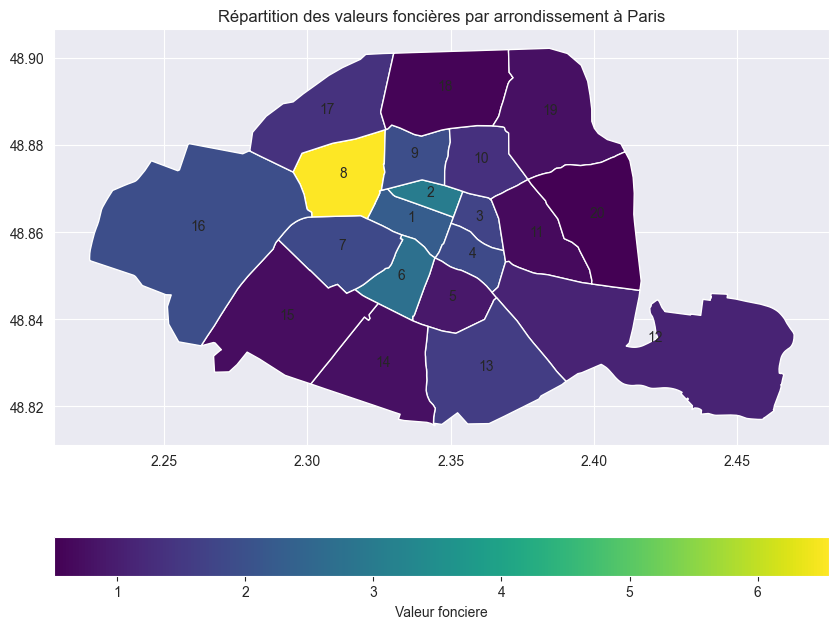

In [226]:
fig, ax= plt.subplots(figsize=(10, 8))
paris_shape.plot(column='valeur_fonciere', cmap='viridis',legend=True, ax=ax, legend_kwds={'label': 'Valeur fonciere', "orientation": 'horizontal'})

for idx, row in paris_shape.iterrows():
    plt.annotate(text=row['c_ar'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), ha='center')

plt.title('Répartition des valeurs foncières par arrondissement à Paris')
plt.show()

# Apprentissage non supervisé - KMeans

Dans cette partie, on cherche à prédire la surface totale d'un bien immobilier grâce à sa valeur foncière, la nature de la culture et le nombre de pièces.

1. Variable cible et variables caractéristiques

In [83]:
df1_cleaned_Kmeans_X = df1_cleaned[['Surface Totale', 'Valeur fonciere', 'Nature culture', 'Nombre pieces principales']]
df1_cleaned_Kmeans_X

,Surface Totale,Valeur fonciere,Nature culture,Nombre pieces principales
3646585,260.21,1825000.00,-1,0.0
3646586,52.00,567000.00,-1,0.0
3646587,36.75,140000.00,-1,1.0
3646588,86.80,400000.00,-1,1.0
3646589,11.40,141343.12,-1,0.0
...,...,...,...,...
3726995,15.00,144000.00,-1,1.0
3726996,0.00,3931000.00,-1,0.0
3726998,206.00,3931000.00,-1,6.0
3727003,0.00,98250.00,-1,0.0


In [84]:
df1_cleaned_Kmeans_X.isnull().sum()

Surface Totale               0
Valeur fonciere              0
Nature culture               0
Nombre pieces principales    0
dtype: int64

2. Import des modules

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from matplotlib.collections import LineCollection

3. Standardisation des données

In [85]:
scaler = StandardScaler()
scaler.fit(df1_cleaned_Kmeans_X[['Valeur fonciere', 'Nombre pieces principales', 'Nature culture']])
scaled_data = scaler.transform(df1_cleaned_Kmeans_X[['Valeur fonciere', 'Nombre pieces principales', 'Nature culture']])
scaled_data = pd.DataFrame(scaled_data, columns=df1_cleaned_Kmeans_X[['Valeur fonciere', 'Nombre pieces principales', 'Nature culture']].columns)
scaled_data

,Valeur fonciere,Nombre pieces principales,Nature culture
0,-0.006571,-0.786131,-0.198038
1,-0.061347,-0.786131,-0.198038
2,-0.079939,-0.125202,-0.198038
3,-0.068618,-0.125202,-0.198038
4,-0.079880,-0.786131,-0.198038
...,...,...,...
66710,-0.079765,-0.125202,-0.198038
66711,0.085127,-0.786131,-0.198038
66712,0.085127,3.179447,-0.198038
66713,-0.081757,-0.786131,-0.198038


4. Méthode du coude (Elbow Method)

In [86]:
inerties = []
for i in range(1, 21): 
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit(scaled_data)
    inerties.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

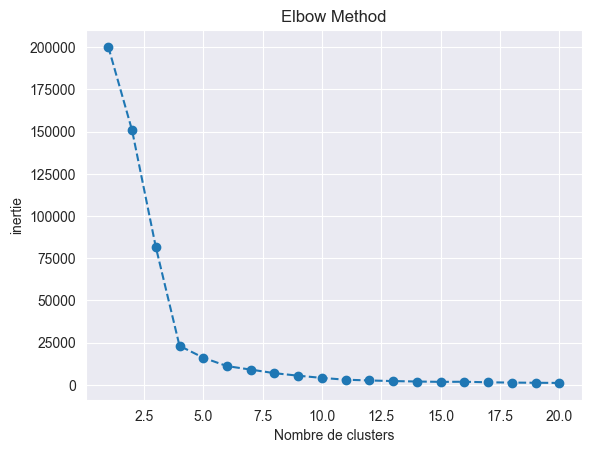

In [87]:
plt.plot(range(1, 21), inerties, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('inertie')
plt.title('Elbow Method')

On observe que le coude est à 4 clusters. On choisira donc 4 clusters pour notre modèle Kmeans.

4. Modélisation

In [88]:
model = KMeans(4, init='k-means++')
model.fit(scaled_data)

KMeans(n_clusters=4)

In [89]:
df1_cleaned_Kmeans_X['Cluster'] = model.labels_
df1_cleaned_Kmeans_X

C:\Users\marte\AppData\Local\Temp\ipykernel_10804\988617694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned_Kmeans_X['Cluster'] = model.labels_


,Surface Totale,Valeur fonciere,Nature culture,Nombre pieces principales,Cluster
3646585,260.21,1825000.00,-1,0.0,2
3646586,52.00,567000.00,-1,0.0,2
3646587,36.75,140000.00,-1,1.0,2
3646588,86.80,400000.00,-1,1.0,2
3646589,11.40,141343.12,-1,0.0,2
...,...,...,...,...,...
3726995,15.00,144000.00,-1,1.0,2
3726996,0.00,3931000.00,-1,0.0,2
3726998,206.00,3931000.00,-1,6.0,0
3727003,0.00,98250.00,-1,0.0,2


5. PCA

On utilise l'ACP pour visualiser les clusters en réduisant la dimension (même si dans notre cas 3 dimensions sont encore visualisables).

In [91]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
df_pca = pca.transform(scaled_data)
df_pca

array([[-2.74029649e-01, -7.62159090e-01, -3.58626356e-02],
       [-3.11821343e-01, -7.50831516e-01,  2.13473448e-03],
       [-2.15412079e-01, -1.00588732e-01, -6.90230793e-02],
       ...,
       [ 4.44657753e-01,  3.09726493e+00, -6.03804529e-01],
       [-3.25903105e-01, -7.46610690e-01,  1.62931345e-02],
       [-2.16666295e-01, -1.00212797e-01, -6.77620378e-02]])

In [94]:
explained_variance = pca.explained_variance_ratio_

Text(0, 0.5, 'Variance Expliquée cumulées')

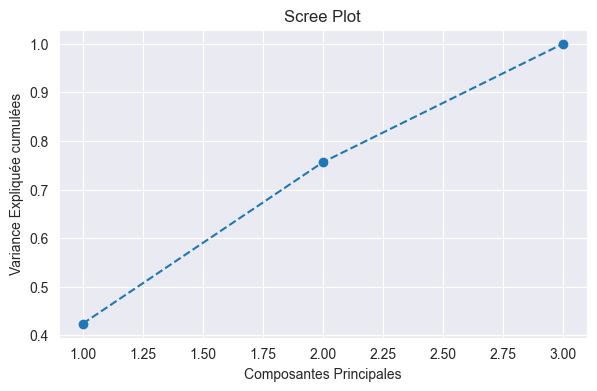

In [93]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Composantes Principales')
plt.ylabel('Variance Expliquée cumulées')

In [95]:
pca = PCA(n_components=2).fit(scaled_data)
projected = pca.transform(scaled_data)

La fonction suivante permet d'afficher les cercles des corrélations des variables avec les axes du plan factoriel. [GitHub](https://github.com/formasys/clustering/blob/main/crime_usa.ipynb)

In [97]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if xmin <= x <= xmax and ymin <= y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')
			
            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
		
            plt.show(block=False)
		

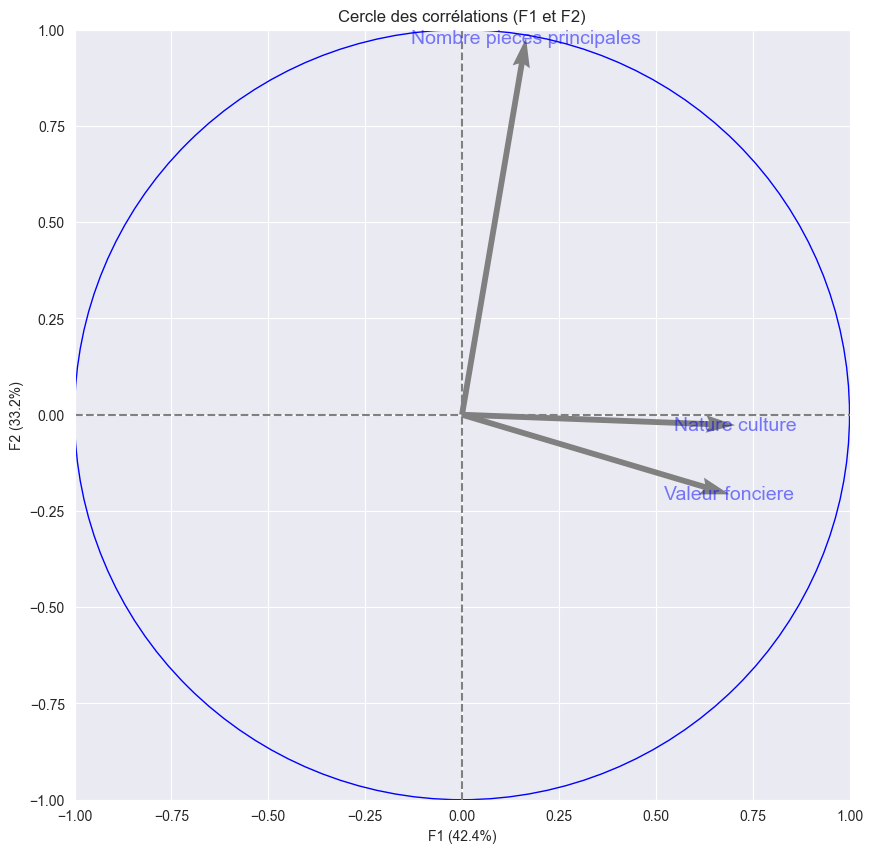

In [98]:
display_circles(pca.components_, 2, pca, [(0,1)], labels=np.array(scaled_data.columns), label_rotation=0)

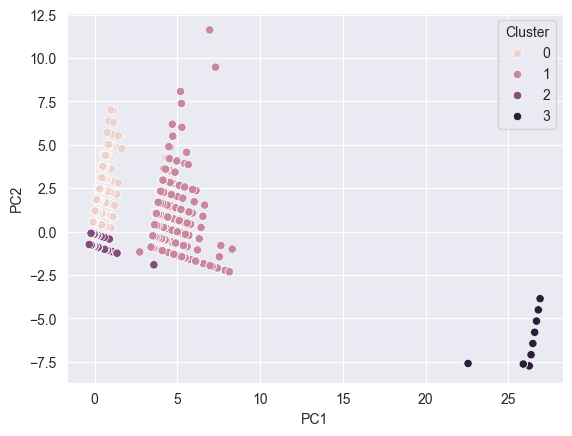

In [100]:
sns.scatterplot(x=projected[:, 0], y=projected[:, 1], hue=df1_cleaned_Kmeans_X['Cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Apprentissage supervié - Régression linéaire

On utilsera la surface totale, la nature de la mutation, et l'arrondissement pour prédire la valeur foncière d'un appartement.

In [113]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
df1_cleaned_with_dates['Date mutation'] = Dates
# drop des ligne avec des valeurs foncières extrêmes et prendre que type local appartement (2)
df1_cleaned_with_dates = df1_cleaned_with_dates[df1_cleaned_with_dates['Code type local'] == 2]
df1_cleaned_with_dates = df1_cleaned_with_dates[df1_cleaned_with_dates['Valeur fonciere'] < 700000000]
df1_cleaned_with_dates['Date mutation'] = df1_cleaned_with_dates['Date mutation'].apply(lambda x: x.toordinal())


df1_cleaned_Xy = df1_cleaned_with_dates[['Surface Totale', 'Code postal', 'Date mutation', 'Valeur fonciere']]

# Drop des ligne avec une surface totale à 0
df1_cleaned_Xy = df1_cleaned_Xy.drop(df1_cleaned_Xy[df1_cleaned_Xy['Surface Totale'] == 0].index)

df1_cleaned_Xy['Prix/m2'] = df1_cleaned_Xy['Valeur fonciere'] / df1_cleaned_Xy['Surface Totale']
df1_cleaned_Xy = df1_cleaned_Xy.drop('Valeur fonciere', axis=1)

df1_cleaned_Xy

In [114]:
df1_cleaned_Xy

,Surface Totale,Code postal,Date mutation,Prix/m2,cluster
3646589,11.40,75018.0,738524,12398.519298,0
3646591,36.11,75018.0,738523,8319.025201,0
3646602,85.81,75020.0,738524,6992.192052,0
3646609,35.01,75018.0,738524,11333.904599,0
3646611,30.66,75008.0,738526,10172.863666,0
...,...,...,...,...,...
3726974,40.00,75016.0,738882,10000.000000,1
3726980,27.50,75006.0,738873,10545.454545,1
3726982,73.00,75011.0,738883,9589.041096,1
3726986,65.05,75011.0,738883,10446.733282,1


In [115]:
X_train, X_test, y_train, y_test = train_test_split(df1_cleaned_Xy[[ 'Code postal', 'Date mutation']], df1_cleaned_Xy['Prix/m2'], test_size=0.2)

In [116]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [117]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Mean error : {np.mean(abs(y_test - y_test_pred) / y_test_pred)}')

print(f'Coefficients : {model.coef_}')
print(f'Intercept : {model.intercept_}')

Mean error : 0.6467042283571744
Coefficients : [-561.85176025    5.67899059]
Intercept : 37967781.73142522


Text(0.5, 1.0, 'Valeur foncière réelle en fonction de la valeur foncière prédite')

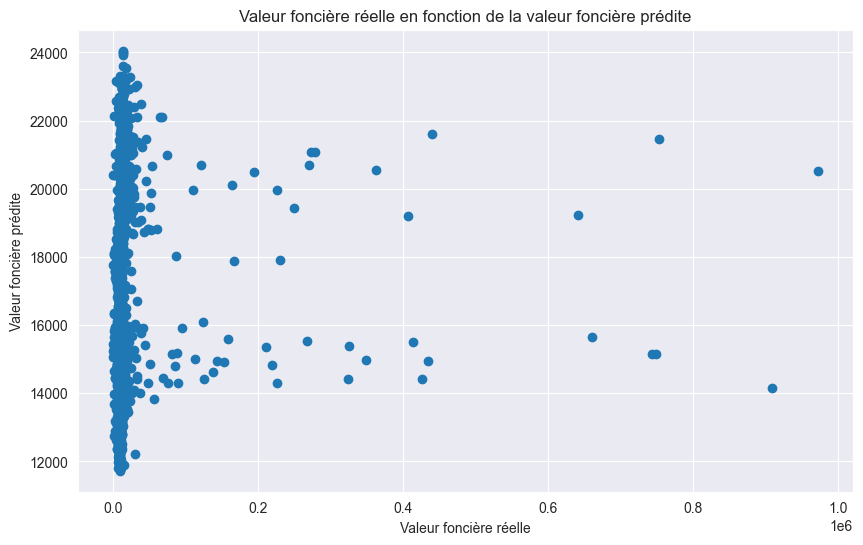

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.xlabel('Valeur foncière réelle')
plt.ylabel('Valeur foncière prédite')
plt.title('Valeur foncière réelle en fonction de la valeur foncière prédite')